<h1>Extração e visualização de dados de estoque</h1>
<h2>Descrição</h2>

Extrair dados essenciais de um conjunto de dados e exibi-los é uma parte necessária da ciência de dados; portanto, os indivíduos podem tomar decisões corretas com base nos dados. Nesta tarefa, você extrairá alguns dados de estoque e, em seguida, exibirá esses dados em um gráfico.

<h2>Índice</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
     <ul>
         <li>Definir uma função que produz um gráfico</li>
         <li>Pergunta 1: Use yfinance para extrair dados de estoque</li>
         <li>Pergunta 2: Use Webscraping para extrair dados de receita da Tesla</li>
         <li>Pergunta 3: Use yfinance para extrair dados de estoque</li>
         <li>Pergunta 4: Use Webscraping para extrair dados de receita do GME</li>
         <li>Pergunta 5: traçar o gráfico de ações da Tesla</li>
         <li>Pergunta 6: traçar o gráfico de ações do GameStop</li>
     </ul>
<p>
     Tempo estimado necessário: <strong>30 min</strong></p>
</div>

<h>

In [96]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Em Python, você pode ignorar avisos usando o módulo warnings. Você pode usar a função filterwarnings para filtrar ou ignorar mensagens ou categorias de aviso específicas.

In [226]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Definir função gráfica

Nesta seção, definimos a função `make_graph`. Você não precisa saber como funciona a função, você deve se preocupar apenas com as entradas. É necessário um dataframe com dados de estoque (o dataframe deve conter as colunas Data e Fechamento), um dataframe com dados de receita (o dataframe deve conter as colunas Data e Receita) e o nome do estoque.

In [98]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Pergunta 1: Use yfinance para extrair dados de estoque

Usando a função `Ticker`, insira o símbolo da ação da qual queremos extrair os dados para criar um objeto ticker. A ação é Tesla e seu símbolo é `TSLA`.

In [99]:
Tesla = yf.Ticker("TSLA")

Usando o objeto ticker e a função `history` extraia informações de estoque e salve-as em um dataframe chamado `tesla_data`. Defina o parâmetro `period` como `max` para obtermos informações pelo máximo de tempo.

In [100]:
tesla_data = Tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,175.449997,182.869995,174.800003,177.770004,85391500,0.0,0.0
2024-03-12 00:00:00-04:00,177.770004,179.429993,172.410004,177.539993,87391700,0.0,0.0
2024-03-13 00:00:00-04:00,173.050003,176.050003,169.149994,169.479996,106524500,0.0,0.0


**Redefina o índice** usando a função `reset_index(inplace=True)` no dataframe tesla_data e exiba as primeiras cinco linhas do dataframe `tesla_data` usando a função `head`. Faça uma captura de tela dos resultados e do código desde o início da Pergunta 1 até os resultados abaixo.

In [101]:
tesla_data.reset_index(inplace=True)

In [102]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3447,2024-03-11 00:00:00-04:00,175.449997,182.869995,174.800003,177.770004,85391500,0.0,0.0
3448,2024-03-12 00:00:00-04:00,177.770004,179.429993,172.410004,177.539993,87391700,0.0,0.0
3449,2024-03-13 00:00:00-04:00,173.050003,176.050003,169.149994,169.479996,106524500,0.0,0.0
3450,2024-03-14 00:00:00-04:00,167.770004,171.169998,160.509995,162.500000,126325700,0.0,0.0


## Pergunta 2: Use Webscraping para extrair dados de receita da Tesla

Utilize a biblioteca `requests` para fazer o download da página web https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Salve o texto da resposta como uma variável chamada `html_data`.


In [164]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [165]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [166]:
response = requests.get(url)
html_data = response.text

Analise os dados HTML usando `beautifulsoup`.

In [167]:
soup = BeautifulSoup(html_data, "html.parser")

Usando `BeautifulSoup` ou a função `read_html`, extraia a tabela com `Tesla Revenue` e armazene-a em um dataframe chamado `tesla_revenue`. O dataframe deve ter as colunas `Date` e `Revenue`.

In [183]:
table = soup.find_all("tbody")[1]

# Extract data from the table
rows = table.find_all("tr")
tesla_revenue_data = []

for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    tesla_revenue_data.append(cols)
    
    # Create DataFrame
tesla_revenue = pd.DataFrame(tesla_revenue_data, columns=["Date", "Revenue"])

# Display DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute a linha a seguir para remover a vírgula e o cifrão da coluna `Revenue`.

In [184]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


Execute as linhas a seguir para remover strings nulas ou vazias na coluna Revenue.

In [185]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


Exiba as últimas 5 linhas do dataframe `tesla_revenue` usando a função `tail`. Faça uma captura de tela dos resultados.

In [187]:
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


<hr>

## Pergunta 3: Use yfinance para extrair dados de estoque

Usando a função `Ticker`, insira o símbolo da ação da qual queremos extrair os dados para criar um objeto ticker. A ação é GameStop e seu símbolo é `GME`.

In [207]:
# Extract stock data using yfinance
gme_ticker = yf.Ticker("GME")

Usando o objeto ticker e a função `history` extraia informações de estoque e salve-as em um dataframe chamado `gme_data`. Defina o parâmetro `period` como `max` para obtermos informações pelo máximo de tempo.

In [208]:
gme_data = gme_ticker.history(period="max")

**Redefina o índice** usando a função `reset_index(inplace=True)` no DataFrame gme_data e exiba as primeiras cinco linhas do dataframe `gme_data` usando a função `head`. Faça uma captura de tela dos resultados e do código desde o início da Pergunta 3 até os resultados abaixo.

In [209]:
# Redefine o índice e exibe as cinco primeiras linhas
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Pergunta 4: Use Webscraping para extrair dados de receita do GME

Utilize a biblioteca `requests` para fazer o download da página web https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Salve o texto da resposta como uma variável chamada `html_data`.


In [202]:
# Question 4
# Download webpage and parse HTML
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_response = requests.get(gme_url)
gme_html_data = gme_response.text


Analise os dados HTML usando `beautifulsoup`.

In [203]:
gme_soup = BeautifulSoup(gme_html_data, 'html.parser')

Usando `BeautifulSoup` ou a função `read_html`, extraia a tabela com `GameStop Revenue` e armazene-a em um dataframe chamado `gme_revenue`. O dataframe deve ter as colunas `Date` e `Revenue`. Certifique-se de que a vírgula e o cifrão sejam removidos da coluna `Revenue` usando um método semelhante ao que você fez na Pergunta 2.

In [222]:
# Isolate the table containing GameStop Revenue
table1 = gme_soup.find_all("tbody")[1]

# Extract data from the table
rows = table1.find_all("tr")
GameStop_Revenue = []

# Extract data from the table
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    GameStop_Revenue.append(cols)
    
    # Create DataFrame
gme_revenue = pd.DataFrame(GameStop_Revenue, columns=["Date", "Revenue"])

# Remove comma and dollar sign from Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")


# Display DataFrame
gme_revenue

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


Exiba as últimas cinco linhas do dataframe `gme_revenue` usando a função `tail`. Faça uma captura de tela dos resultados.

In [220]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Pergunta 5: traçar o gráfico de ações da Tesla

Use a função `make_graph` para representar graficamente os dados de ações da Tesla e também forneça um título para o gráfico. A estrutura para chamar a função `make_graph` é `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Observe que o gráfico mostrará apenas dados até junho de 2021.

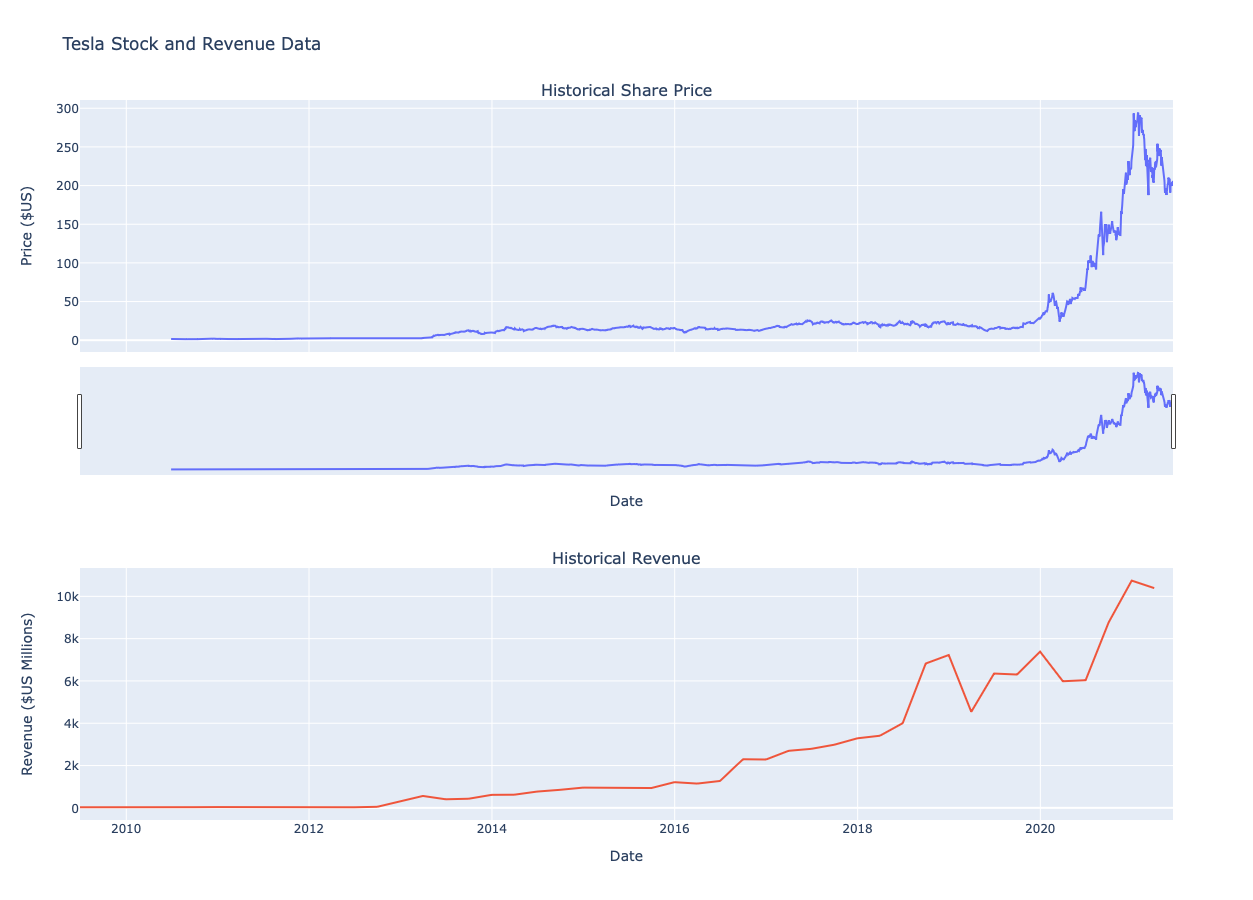

In [232]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Data')

## Pergunta 6: traçar o gráfico de ações do GameStop

Use a função `make_graph` para representar graficamente os dados de estoque do GameStop e também forneça um título para o gráfico. A estrutura para chamar a função `make_graph` é `make_graph(gme_data, gme_revenue, 'GameStop')`. Observe que o gráfico mostrará apenas dados até junho de 2021.

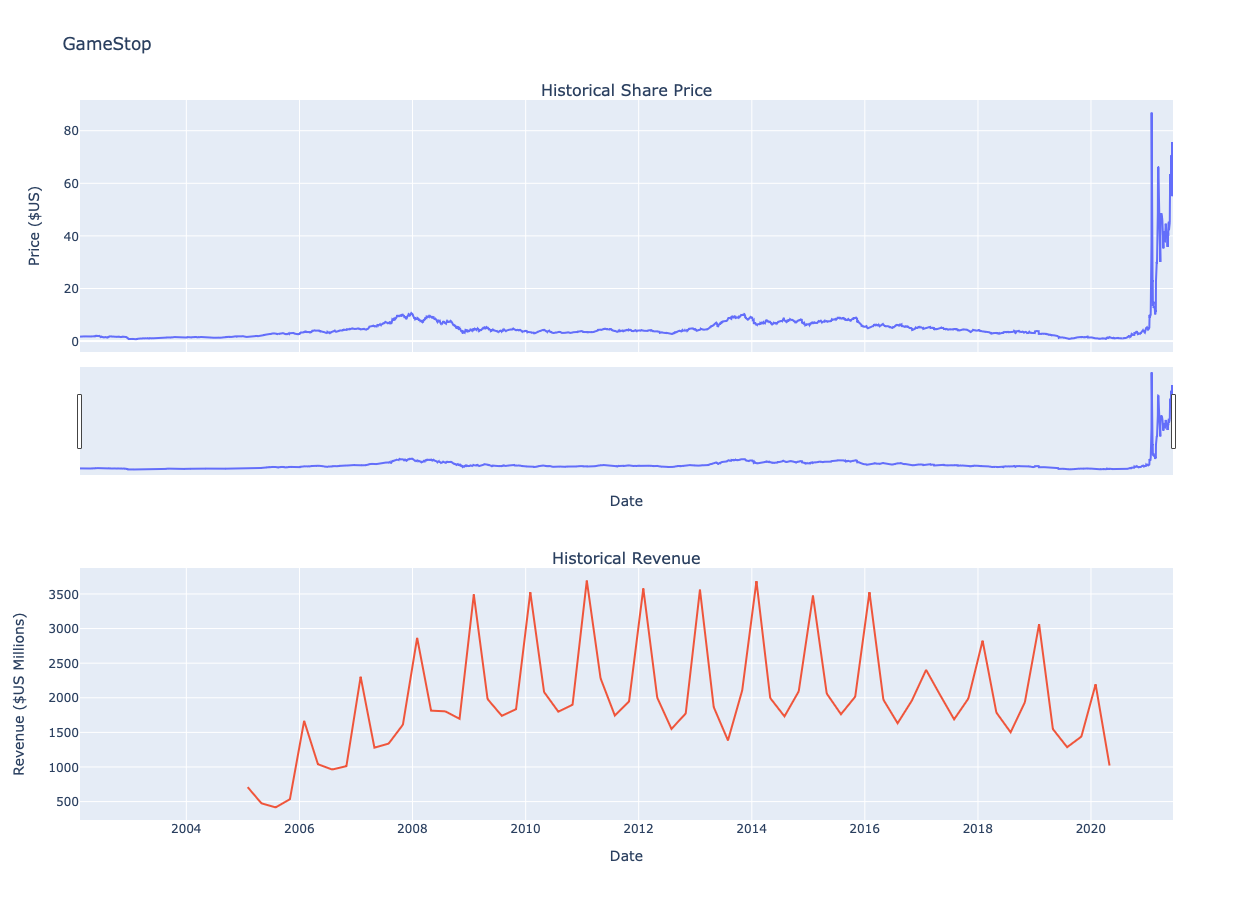

In [233]:
make_graph(gme_data, gme_revenue, 'GameStop')